In [ ]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.6253 - accuracy: 0.7973 - val_loss: 0.1491 - val_accuracy: 0.9551
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1513 - accuracy: 0.9590 - val_loss: 0.1078 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1057 - accuracy: 0.9711 - val_loss: 0.1018 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0820 - accuracy: 0.9776 - val_loss: 0.0639 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0687 - accuracy: 0.9814 - val_loss: 0.0513 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0546 - accuracy: 0.9853 - val_loss: 0.0595 - val_accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0580 - accuracy: 0.9847 - val_loss: 0.0499 -

In [ ]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(final_loss, final_acc))

Final loss: 0.0466, final accuracy: 0.987


In [ ]:
import matplotlib.pyplot as plt


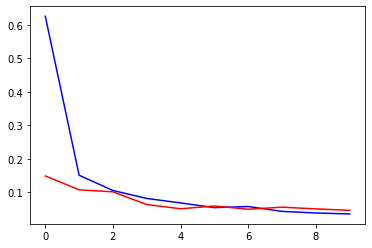

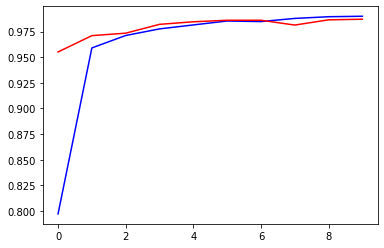

In [ ]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.show()
